In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [4]:
dat = astropy.io.ascii.read("Tonry_2003.vot")

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity [km/s]')

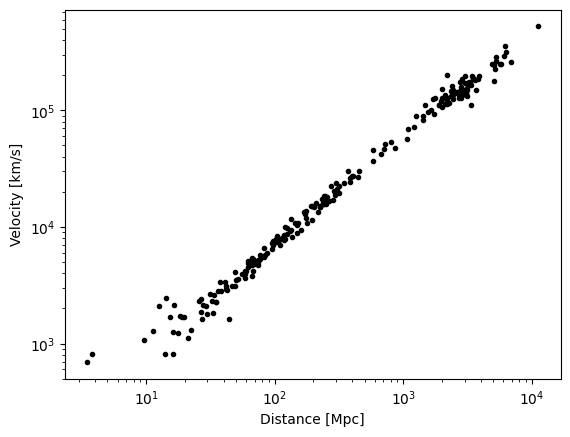

In [5]:
distance = 10**dat["col8"] / 72.0 * u.mpc
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

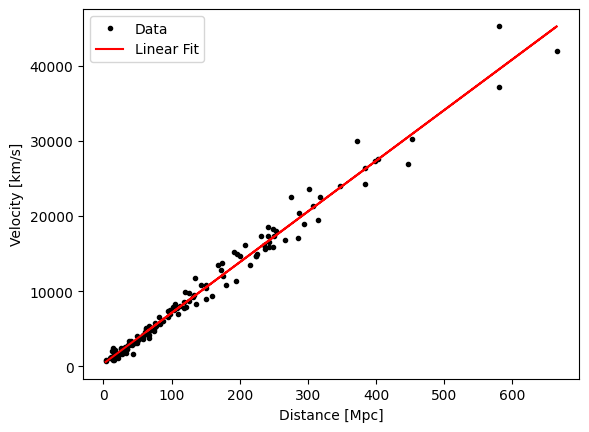

In [21]:
ind = np.where((x > 0) & (x < 700))
x = distance.to(u.mpc).value[ind]
y = velocity.to(u.km / u.s).value[ind]
# Fit a linear regression model
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
# Create the fitted line
fitted_line = slope * x + intercept
# Plot the data and the fitted line
plt.plot(x, y, marker=".", color="black", linestyle="none", label="Data")
plt.plot(x, fitted_line, color="red", label="Linear Fit")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.legend()
plt.show()


In [22]:
H0 = slope * u.km / u.s / u.mpc
# Print the result
print(f"Hubble constant (H0): {H0:.2f}")

Hubble constant (H0): 67.48 km / (mpc s)


In [24]:
# Calculate the age of the universe
age_universe = 1 / H0
# Print the age of the universe
print(f"Age of the universe: {age_universe:.4f}")

Age of the universe: 0.0148 mpc s / km


In [26]:
# Calculate the residuals
residuals = y - fitted_line
# Calculate the variance of the residuals
variance = np.var(residuals)
# Calculate the reduced chi-squared statistic
reduced_chi_squared = np.sum((residuals ** 2) / variance) / (len(x) - 2)
# Print the reduced chi-squared statistic
print(f"Reduced Chi-squared: {reduced_chi_squared:.4f}")


Reduced Chi-squared: 1.0142
